# Laboratorio 5

## Problema

Dado un arreglo:
$$
v \in Z^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [0,9]
$$
Se le pide encontrar los pares:
$$
(x_{p}, y_{p})
$$
Los pares deben cumplir lo siguiente:
$$
x_{p} * y_{p} = k^{2}
$$
$$
x_{p} \in v
$$
$$
y_{p} \in v
$$
$$
\forall \ x_{p} = v_{i} \ \wedge \ y_{p} = v_{j} \ \Rightarrow \ i \neq j
$$  

## Ítems

1. En una celda mágica generar un archivo de nombre `encontrar_pares.c`. Dentro de este archivo codifique la función `encontrar_pares` que cumplan con lo solicitado por el problema.

2. En una celda, coloque el comando necesario para crear el *object file*.

3. En una celda, coloque el comando necesario para crear la *shared library*.

4. Haga una función que posibilite el enlace con Python mediante el módulo `ctypes`. La función deberá tener el mismo nombre que su función en C, pero con el prefijo `ctypes_`.

5. Haga una instancia de la función del ítem anterior que tenga el sufijo `_raw`.

6. En una celda, realice una prueba de funcionalidad con la función del ítem anterior con el arreglo `[9, 5, 4, 3, 1, 7, 2, 8]`. Use la función `zeros` del módulo `numpy` para crear los arreglos auxiliares que necesite.

7. Implemente una función de nombre `c_encontrar_pares` en Python que envuelva la instancia de la función de manera que la administración de la memoria es transparente al usuario y se devuelvan los arreglos con los valores de $x$ y $y$. Use la función `zeros` del módulo `numpy` para crear los arreglos auxiliares que necesite.

8. En una celda, realice una prueba de funcionalidad con la función del ítem anterior con el arreglo `[9, 5, 4, 3, 1, 7, 2, 8]`.

9. Implemente en Python una función de nombre `python_encontrar_pares` que le servirá como referencia. Debe usar python crudo, es decir, no puede usar módulos, salvo la función `zeros` del módulo `numpy` para crear los arreglos auxiliares que necesite.

10. En una celda, realice una prueba de funcionalidad con la función del ítem anterior con el arreglo `[9, 5, 4, 3, 1, 7, 2, 8]`.

11. En una celda, calcule el error relativo del arreglo que contiene los valores de $x$. Use los valores calculados por la función `python_encontrar_pares` como referencia.

12. En una celda, calcule el error relativo del arreglo que contiene los valores de $y$. Use los valores calculados por la función `python_encontrar_pares` como referencia.

13. En una celda, realice 50 mediciones de tiempo para un arreglo de `1024` elementos para sus funciones `c_encontrar_pares` y `python_encontrar_pares`. Las mediciones de tiempo de cada una de las funciones deberán estar en listas independientes.

14. En una celda, presente el código que genere una gráfica de las mediciones de tiempo realizadas para la función `python_contrar_pares` y su mediana de las mediciones.

15. En una celda, presente el código que genere una gráfica de las mediciones de tiempo realizadas para la función `c_contrar_pares` y su mediana de las mediciones.

16. Dados los tamaños `[32, 64, 128, 256, 512, 1024]`. Realice 50 mediciones de tiempo por cada tamaño para sus funciones `c_encontrar_pares` y `python_encontrar_pares`. Para cada tamaño considere que la medición se corresponderá con la mediana de las 50 mediciones realizadas.

17. En una celda, presente el código que genere una gráfica de "tiempo de ejecución vs tamaño" para sus funciones `c_encontrar_pares` y `python_encontrar_pares`.

18. En una celda, presente el código que genere una gráfica de "speedup vs tamaño". Considere que está midiendo el *speedup* de la función en C, respecto de la función en Python.

Tabla de puntos:

| ítem | puntos |
|:----:|:------:|
|   1  |   3.0  |
|   2  |   0.25 |
|   3  |   0.25 |
|   4  |   0.5  |
|   5  |   0.5  |
|   6  |   0.5  |
|   7  |   0.5  |
|   8  |   0.5  |
|   9  |   3.0  |
|  10  |   0.5  |
|  11  |   0.5  |
|  12  |   0.5  |
|  13  |   1.0  |
|  14  |   0.5  |
|  15  |   0.5  |
|  16  |   2.0  |
|  17  |   0.25 |
|  18  |   0.25 |


## Observaciones

1. Sobre la función `encontrar_pares`, tenga en cuenta lo siguiente:

* Los elementos $x_{p}$ deben estar en memoria dinámica.
* Los elementos $y_{p}$ deben estar en memoria dinámica.
* Los punteros a los elementos $x$ y $y$ deben ser pasados por referencia a la función `encontrar_pares`.
* El valor de $k$ no es argumento de la función `encontrar_pares`, ni variable local. La expresión $k^{2}$  lo que significa es que el producto de $x_{p}$ y $y_{p}$ es un cuadrado perfecto.

2. Los ítems que valen menos de un punto deberán ser perfectamente funcionales para tener algún tipo de puntaje asignado.
3. Los puntajes sobre mediciones solo serán asignados bajo el supuesto de que sus funciones hacen lo esperado.
4. En sus mediciones de error relativo considere solo los elementos con valores no nulos.
5. La presentación deberá ser un cuaderno de *jupyter* de nombre `lab5_codigoalumno` con formato `.ipynb`. No se aceptará ningún otro formato.

In [ ]:
# no borrar esta celda
! rm *.c
! rm *.o
! rm *.so

In [ ]:
%%file encontrar_pares2.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>

int encontrar_pares(int *v, int n, int *x, int *y) {
    int num_pares = 0;

    for (int i = 0; i < n; i++) {
        for (int j = i + 1; j < n; j++) {
            int product = v[i] * v[j];
            int sqrt_product = (int)sqrt(product);
            
            if (sqrt_product * sqrt_product == product) {
                x[num_pares] = v[i];
                y[num_pares] = v[j];
                num_pares++;
            }
        }
    }
    
    return num_pares;
}

Writing encontrar_pares2.c


In [17]:
# item 2 y 3
! gcc -c encontrar_pares2.c
! gcc -shared encontrar_pares2.o -o encontrar_pares2.so

In [18]:
# item 4

import ctypes
import numpy as np

# Load the shared library
lib = ctypes.CDLL('./encontrar_pares2.so')

# Define the input and output types for the function
lib.encontrar_pares.argtypes = [np.ctypeslib.ndpointer(dtype=np.int32),
                                ctypes.c_int, 
                                np.ctypeslib.ndpointer(dtype=np.int32),
                                np.ctypeslib.ndpointer(dtype=np.int32)]
lib.encontrar_pares.restype = ctypes.c_int

def ctypes_encontrar_pares(v):
    n = len(v)
    x = np.zeros(n, dtype=np.int32)
    y = np.zeros(n, dtype=np.int32)
    
    num_pares = lib.encontrar_pares(v,n, x, y)
    return x[:num_pares], y[:num_pares]


In [19]:
# item 5
ctypes_encontrar_pares_raw = ctypes_encontrar_pares

In [20]:
# item 6
import numpy as np

v = np.array([9, 5, 4, 3, 1, 7, 2, 8],dtype=np.int32)
x, y = ctypes_encontrar_pares_raw(v)
print("x:", x)
print("y:", y)

x: [9 9 4 2]
y: [4 1 1 8]


In [21]:
# item 7
def c_encontrar_pares(arr_v):
    arr_x, arr_y = ctypes_encontrar_pares(arr_v)
    return arr_x, arr_y

In [22]:
# item 8
v = np.array([9, 5, 4, 3, 1, 7, 2, 8], dtype=np.int32)
x_ref, y_ref = c_encontrar_pares(v)
print("x referencia:", x_ref)
print("y referencia:", y_ref)

x referencia: [9 9 4 2]
y referencia: [4 1 1 8]


In [23]:
# item 9
import numpy as np

def python_encontrar_pares(v):
    n = len(v)
    x_values = []
    y_values = []
    
    for i in range(n):
        for j in range(i + 1, n):
            product = v[i] * v[j]
            sqrt_product = int(np.sqrt(product))
            
            if sqrt_product * sqrt_product == product:
                x_values.append(v[i])
                y_values.append(v[j])
    
    return np.array(x_values, dtype=np.int32), np.array(y_values, dtype=np.int32)

In [24]:
# item 10
v = np.array([9, 5, 4, 3, 1, 7, 2, 8], dtype=np.int32)
x_ref, y_ref = python_encontrar_pares(v)
print("x referencia:", x_ref)
print("y referencia:", y_ref)

x referencia: [9 9 4 2]
y referencia: [4 1 1 8]


In [25]:
# item 11 y 12
from numpy import linalg as LA

# Test the relative error for the given input
arr_x_ctypes, arr_y_ctypes = c_encontrar_pares(v)
arr_x_python, arr_y_python = python_encontrar_pares(v)

def relative_error_x(arr_x_ctypes, arr_x_python):
    return LA.norm(arr_x_ctypes - arr_x_python) / LA.norm(arr_x_python)

def relative_error_y(arr_y_ctypes, arr_y_python):
    return LA.norm(arr_y_ctypes - arr_y_python) / LA.norm(arr_y_python)

rel_error_x = relative_error_x(arr_x_ctypes, arr_x_python)
rel_error_y = relative_error_y(arr_y_ctypes, arr_y_python)

print("Relative error of arr_x:", rel_error_x)
print("Relative error of arr_y:", rel_error_y)

Relative error of arr_x: 0.0
Relative error of arr_y: 0.0


In [26]:
# item 13
import matplotlib.pyplot as plt
import time

def measure_time(func,v, num_measurements):
    times = []
    for _ in range(num_measurements):
        start_time = time.time()
        func(v)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

arr_size = 1024

# Perform 50 time measurements for c_encontrar_pares
times_c = measure_time(c_encontrar_pares, v ,50)

# Perform 50 time measurements for python_encontrar_pares
times_python = measure_time(python_encontrar_pares,v, 50)

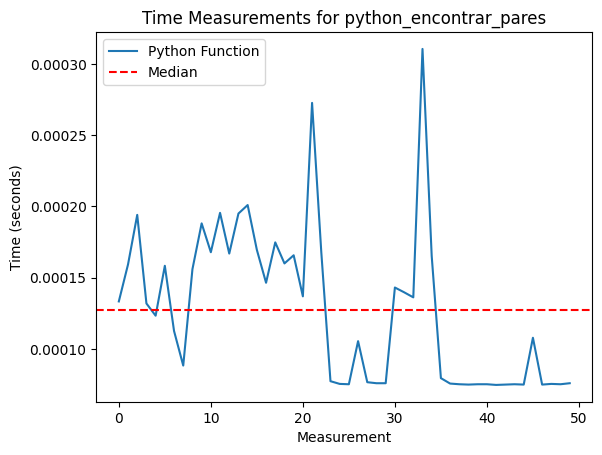

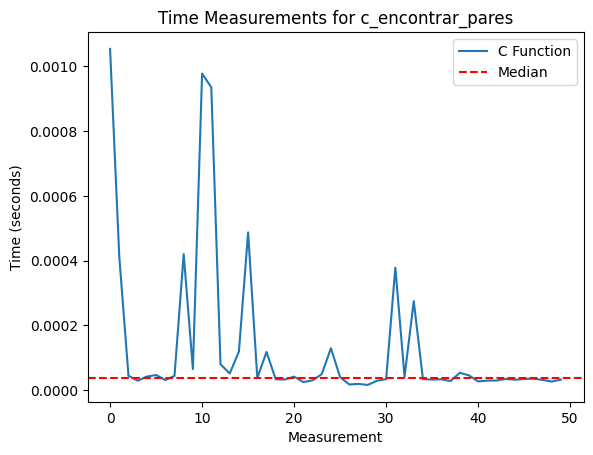

In [27]:
# item 14
plt.figure()
plt.plot(times_python, label='Python Function')
plt.axhline(np.median(times_python), color='red', linestyle='dashed', label='Median')
plt.xlabel('Measurement')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Time Measurements for python_encontrar_pares')
plt.show()

# item c
plt.figure()
plt.plot(times_c, label='C Function')
plt.axhline(np.median(times_c), color='red', linestyle='dashed', label='Median')
plt.xlabel('Measurement')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Time Measurements for c_encontrar_pares')
plt.show()


In [ ]:
import numpy as np  # Asegúrate de importar numpy

sizes = [32, 64, 128, 256, 512, 1024]
num_measurements = 50

times_c_sizes = {}
times_python_sizes = {}

for size in sizes:
    arr_v_size = np.random.randint(1, 1000, size=size, dtype=np.int32)  # Asegurarse de usar dtype=np.int32
    
    times_c = measure_time(c_encontrar_pares, arr_v_size, num_measurements)
    times_c_sizes[size] = np.median(times_c)
    
    times_python = measure_time(python_encontrar_pares, arr_v_size, num_measurements)
    times_python_sizes[size] = np.median(times_python)

print("Median times for c_encontrar_pares:")
print(times_c_sizes)

print("\nMedian times for python_encontrar_pares:")
print(times_python_sizes)

In [ ]:
# item 17

plt.figure()
plt.plot(sizes, list(times_c_sizes.values()), marker='o', label='C Function')
plt.plot(sizes, list(times_python_sizes.values()), marker='o', label='Python Function')
plt.xlabel('Array Size')
plt.ylabel('Median Time (seconds)')
plt.legend()
plt.title('Time of Execution vs. Size')
plt.show()

In [ ]:
# item 18

speedup = {size: times_python_sizes[size] / times_c_sizes[size] for size in sizes}

plt.figure()
plt.plot(sizes, list(speedup.values()), marker='o')
plt.xlabel('Array Size')
plt.ylabel('Speedup (Python / C)')
plt.title('Speedup vs. Size')
plt.show()